In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Barplots

In [4]:
penguins = sns.load_dataset("penguins")
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [5]:
sns.set_style("darkgrid")

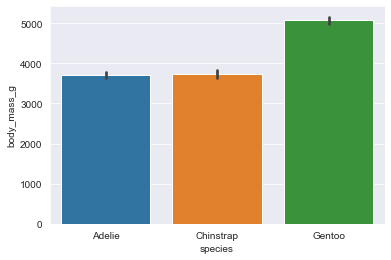

In [10]:
sns.barplot(x="species", y="body_mass_g", data=penguins);

# barplot is used to show mean of body mass for each group of categorical variables
# avg. body_mass values are represented as heigths of bars in y axis

In [9]:
penguins.groupby("species").body_mass_g.mean()

species
Adelie       3700.662252
Chinstrap    3733.088235
Gentoo       5076.016260
Name: body_mass_g, dtype: float64

## Horizontal Barplot

<AxesSubplot:xlabel='body_mass_g', ylabel='species'>

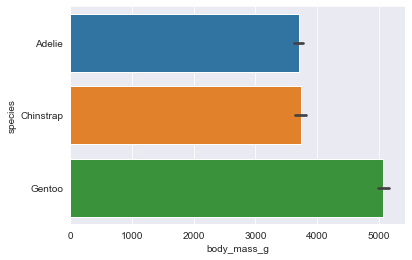

In [11]:
# to get horizontal barplots categorical variables pass to the y axis

sns.barplot(x="body_mass_g", y="species", data= penguins);


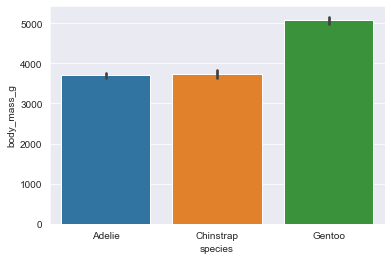

In [31]:
sns.barplot(x="species", y="body_mass_g", data=penguins, ci=95); # ci=0.95 default value

# error bars automatically represented estimated lines according to the 0.95 * mean value

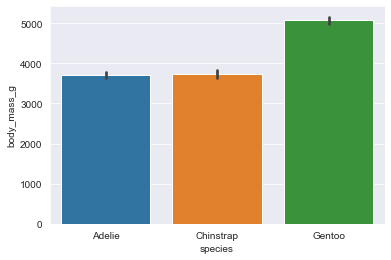

In [21]:
sns.barplot(x="species", y="body_mass_g", data=penguins, estimator=np.mean);

# the default value of estimator parameter is np.mean

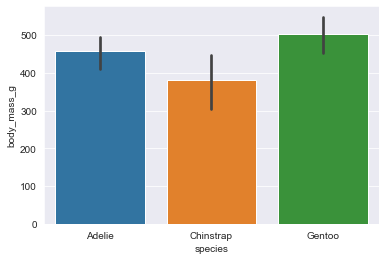

In [23]:
sns.barplot(x="species", y="body_mass_g", data=penguins, estimator=np.std);

# std values for each group are represented in y axis when we use estimator parameter as np.std 

In [24]:
penguins.groupby("species").body_mass_g.describe()

,count,mean,std,min,25%,50%,75%,max
species,,,,,,,,
Adelie,151.0,3700.662252,458.566126,2850.0,3350.0,3700.0,4000.0,4775.0
Chinstrap,68.0,3733.088235,384.335081,2700.0,3487.5,3700.0,3950.0,4800.0
Gentoo,123.0,5076.016260,504.116237,3950.0,4700.0,5000.0,5500.0,6300.0


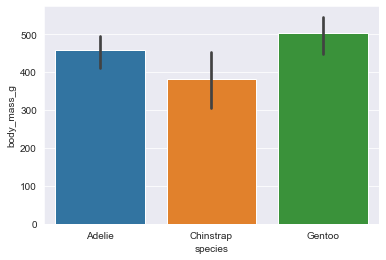

In [33]:
sns.barplot(x="species", y="body_mass_g", data=penguins, estimator=np.std, ci=95); # ci:confidence intervals

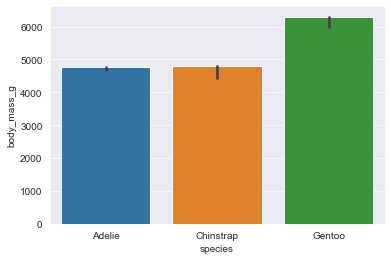

In [34]:
# barplot according to max values of each group

sns.barplot(x="species", y="body_mass_g", data=penguins, estimator=np.max, ci=95);

## More categorical variables

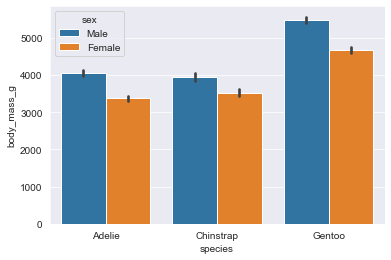

In [35]:
sns.barplot(x="species", y="body_mass_g", data= penguins, hue="sex"); # hue parameter is used to add new categorical variables into the chart

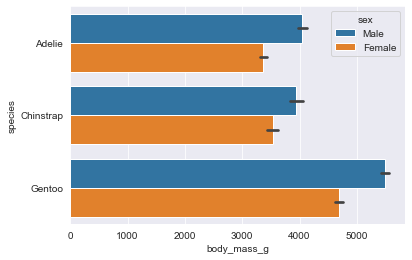

In [36]:
sns.barplot(x="body_mass_g", y="species", data= penguins, hue="sex");

### order, hue-order

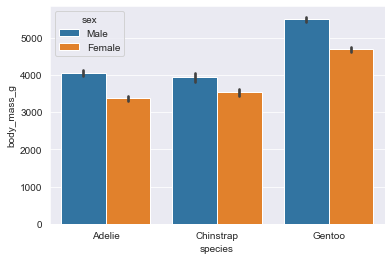

In [40]:
sns.barplot(x="species", y="body_mass_g", data= penguins, hue="sex");

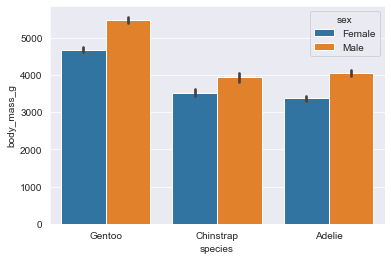

In [39]:
# order parameter is used to order x labels
# hue_order is used to categories which passed to hue parameter

sns.barplot(x="species", y="body_mass_g", data= penguins, hue="sex",
           order= ["Gentoo","Chinstrap","Adelie"],
           hue_order=["Female","Male"]);

## Styling and Colors

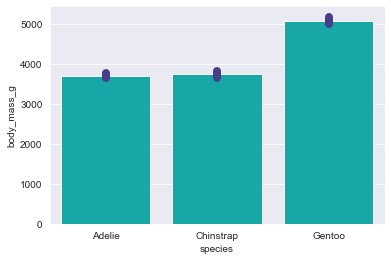

In [43]:
# color parameter is used to adjust bars' color.
# palette parameter is used to adjust colors of each bar.
# errcolor parameter is used to adjust error lines' colors.
# errwidth parameter is used to adjust error lines' width.

sns.barplot(x="species", y="body_mass_g", data= penguins,
            color="c",
            errcolor="darkslateblue",
            errwidth=8);

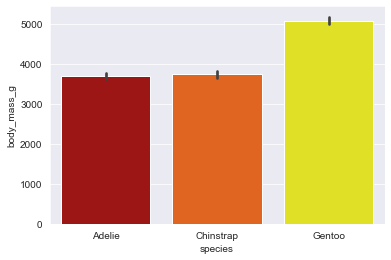

In [44]:
# palette parameter is used to adjust colors of each bar.
# there are 170 different palette options

sns.barplot(x="species", y="body_mass_g", data= penguins,
            palette="hot");

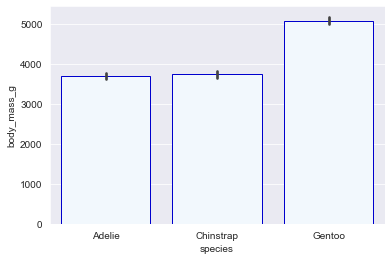

In [45]:
# edge color parameter is used to adjust colors of bar edge.

sns.barplot(x="species", y="body_mass_g", data= penguins,
            color="aliceblue",
           edgecolor="mediumblue");

## Stacked Barplot

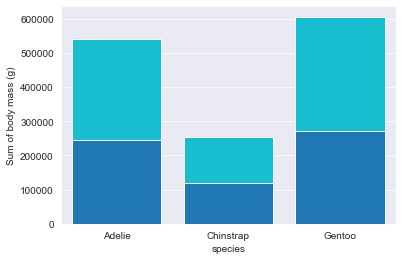

In [49]:
sns.barplot(x="species", y="body_mass_g",
            data= penguins[penguins.sex=="Female"],
            color="tab:blue",
            order= ["Adelie","Chinstrap","Gentoo"],
            ci=None,
            estimator=np.sum,
            saturation=1
           )

sns.barplot(x="species", y="body_mass_g",
            data= penguins[penguins.sex=="Male"],
            color="tab:cyan",
            order= ["Adelie","Chinstrap","Gentoo"],
            ci=None,
            estimator=np.sum,
            bottom=(
                penguins[penguins.sex=="Female"]
                .groupby("species")
                .body_mass_g
                .sum()),
            saturation=1
            )

plt.ylabel("Sum of body mass (g)");

### Much much easier to accomplish this with pandas plotting method!...And comes with legend already built.

In [50]:
sns.set_style("white")

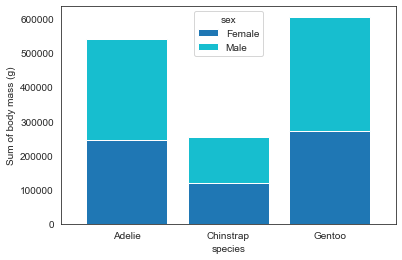

In [61]:

(penguins.groupby(["species","sex"]).body_mass_g.sum().unstack()).plot(kind="bar", stacked=True, color=["tab:blue","tab:cyan"], width=0.8)
plt.xticks(rotation=0)
plt.ylabel("Sum of body mass (g)");

# Countplot

In [62]:
diamonds= sns.load_dataset("diamonds")
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [63]:
diamonds= diamonds[diamonds.clarity.isin(["SI1","VS2"])]

In [64]:
diamonds.shape

(25323, 10)

## Basics

In [65]:
sns.set_style("darkgrid")

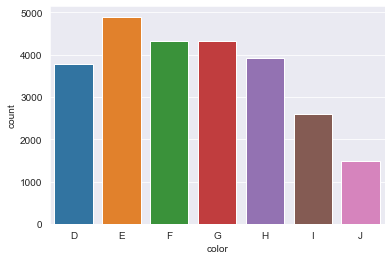

In [66]:
sns.countplot(x="color", data=diamonds);

In [67]:
diamonds.color.value_counts()

E    4896
F    4332
G    4323
H    3918
D    3780
I    2593
J    1481
Name: color, dtype: int64

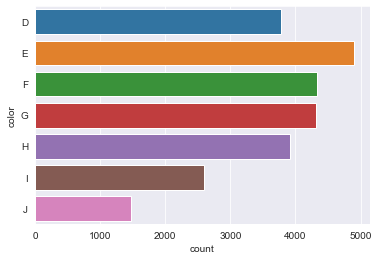

In [68]:
sns.countplot(y="color", data=diamonds);

## Order Ascending or Descending

In [70]:
diamonds.color.value_counts().index

CategoricalIndex(['E', 'F', 'G', 'H', 'D', 'I', 'J'], categories=['D', 'E', 'F', 'G', 'H', 'I', 'J'], ordered=False, dtype='category')

<AxesSubplot:xlabel='color', ylabel='count'>

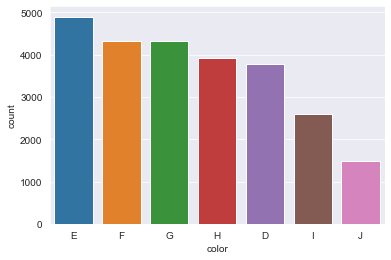

In [71]:
sns.countplot(x="color", data=diamonds, order=diamonds.color.value_counts().index)

<AxesSubplot:xlabel='color', ylabel='count'>

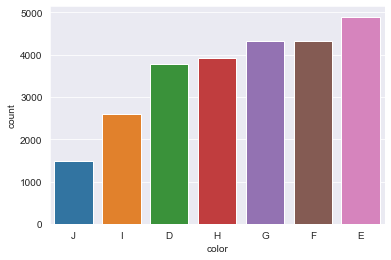

In [72]:
sns.countplot(x="color", data=diamonds, order=diamonds.color.value_counts().index[::-1])

<AxesSubplot:xlabel='color', ylabel='count'>

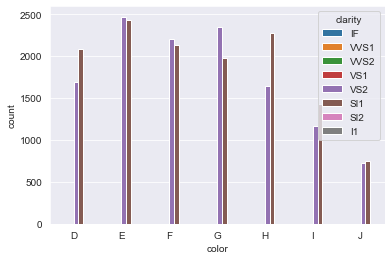

In [73]:
sns.countplot(x="color", data=diamonds, hue="clarity")
# yukarıda clarity SI1 ve VS2 olanları seçmemize rağmen legend da bütün clarity değerlerini getirdi.
# Bunu önlemek için hue_order parametresi kullanılır.

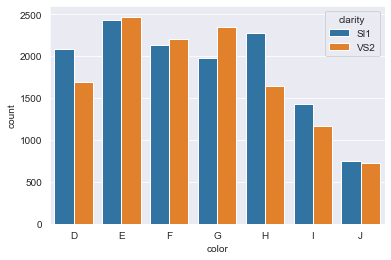

In [74]:
sns.countplot(x="color", data=diamonds, hue="clarity", hue_order=["SI1","VS2"]);

## Styling

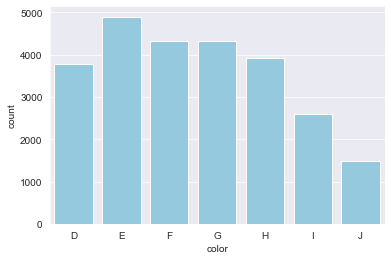

In [75]:
sns.countplot(x="color", data=diamonds, color="skyblue");  # color parameter is used to make same color of all bars

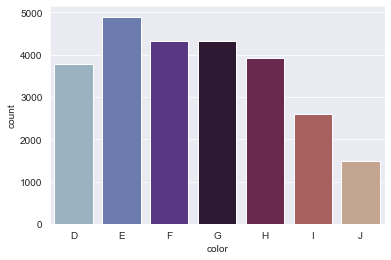

In [77]:
sns.countplot(x="color", data=diamonds, palette="twilight");  # to adjust different colors for each bar, we use palette option

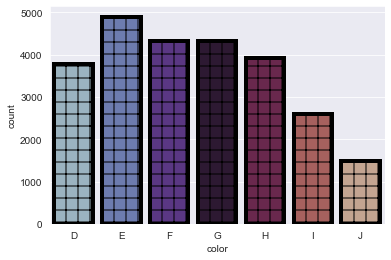

In [85]:
sns.countplot(x="color", data=diamonds, palette="twilight", lw=4, ec="black", hatch="+"); 

# Boxplot

In [99]:
cars= sns.load_dataset("mpg").dropna()
cars.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


## Basics

In [100]:
sns.set_style("whitegrid")

In [101]:
cars.cylinders.value_counts()

4    199
8    103
6     83
3      4
5      3
Name: cylinders, dtype: int64

In [102]:
cars.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [103]:
cars = cars[cars["cylinders"].isin([4,6,8])]

In [104]:
cars.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


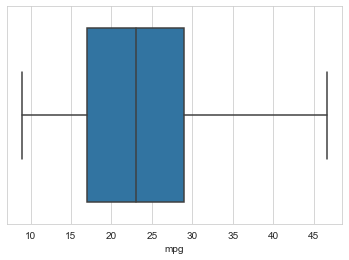

In [107]:
sns.boxplot(data=cars, x="mpg");

In [108]:
cars.mpg.describe()

count    385.000000
mean      23.445455
std        7.836911
min        9.000000
25%       17.000000
50%       23.000000
75%       29.000000
max       46.600000
Name: mpg, dtype: float64

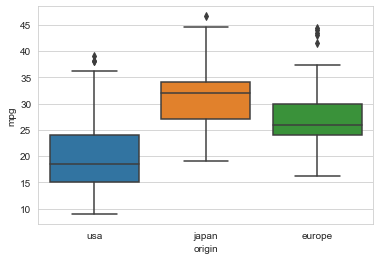

In [111]:
sns.boxplot(x="origin", y="mpg", data=cars);

### hue

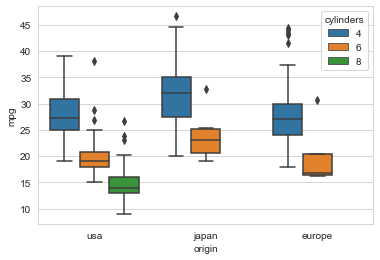

In [112]:
sns.boxplot(x="origin", y="mpg", data=cars, hue="cylinders");

## By model year

In [114]:
# you can create your category

cars.model_year.describe()

count    385.000000
mean      75.961039
std        3.692058
min       70.000000
25%       73.000000
50%       76.000000
75%       79.000000
max       82.000000
Name: model_year, dtype: float64

In [115]:
cars["newer_model"] = cars.model_year > 76

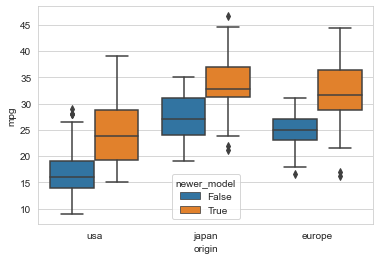

In [116]:
sns.boxplot(x="origin", y="mpg", data=cars, hue="newer_model");

## Styling

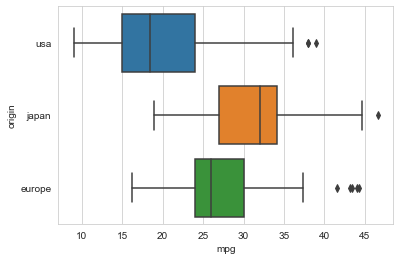

In [118]:
sns.boxplot(x="mpg", y="origin", data=cars);

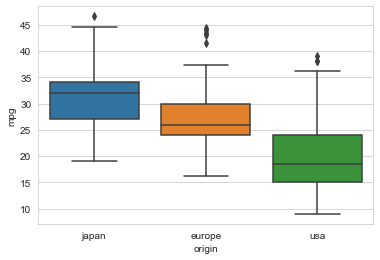

In [120]:
sns.boxplot(x="origin", y="mpg", data=cars, order=["japan","europe","usa"]);

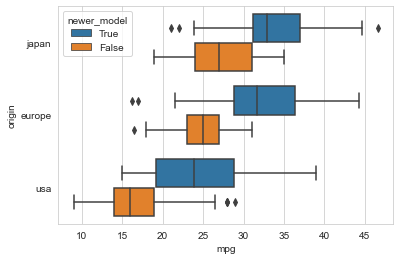

In [127]:

sns.boxplot(x="mpg", y="origin", data=cars, hue="newer_model", order=["japan","europe","usa"], hue_order=[True,False]);

## color

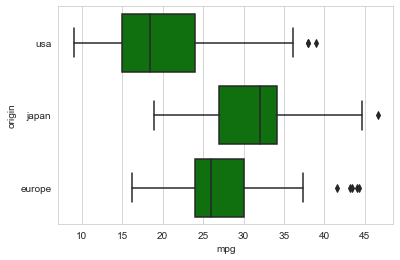

In [129]:
sns.boxplot(x="mpg", y="origin", data=cars, color="g");

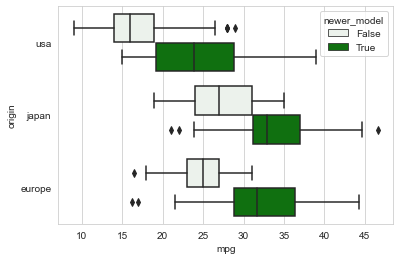

In [130]:
sns.boxplot(x="mpg", y="origin", data=cars, color="g", hue="newer_model");

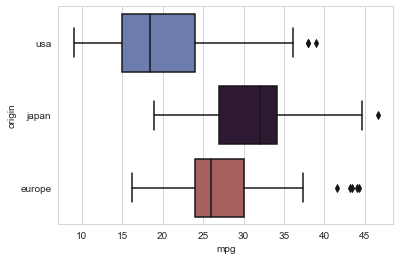

In [131]:
sns.boxplot(x="mpg", y="origin", data=cars, palette="twilight");

## width, linewidth

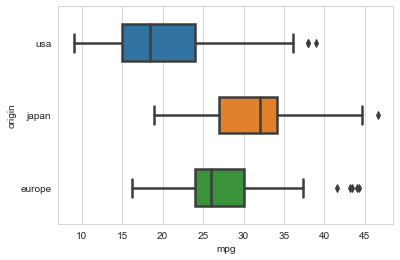

In [134]:
sns.boxplot(x="mpg", y="origin", data=cars, width=0.5, linewidth=2.5);

## length of whiskers

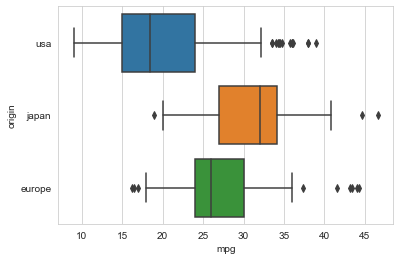

In [137]:
sns.boxplot(x="mpg", y="origin", data=cars, whis=1);  # default whis value is 1.5

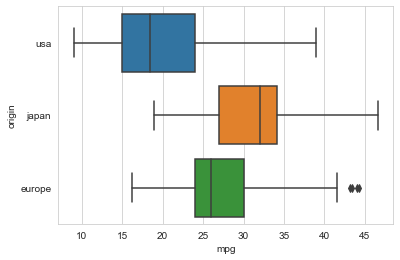

In [136]:
sns.boxplot(x="mpg", y="origin", data=cars, whis=2);

## flier size

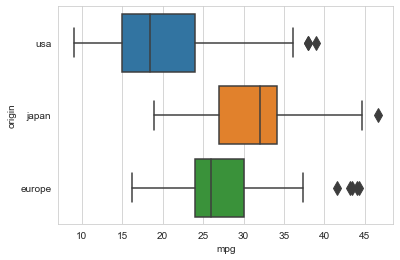

In [138]:
sns.boxplot(x="mpg", y="origin", data=cars, fliersize=10);  # fliersize is used to adjust the size of outliers

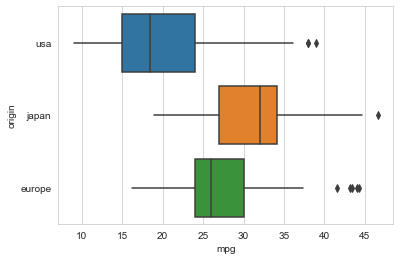

In [139]:
sns.boxplot(x="mpg", y="origin", data=cars, showcaps=False); # When showcaps parameter passed as False it removes caps

# Violinplot

In [140]:
sns.set_style("whitegrid")

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


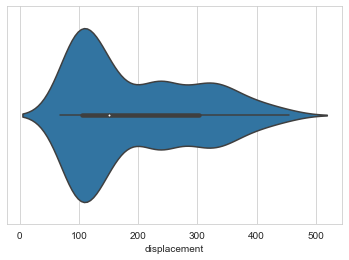

In [141]:
sns.violinplot(cars.displacement);

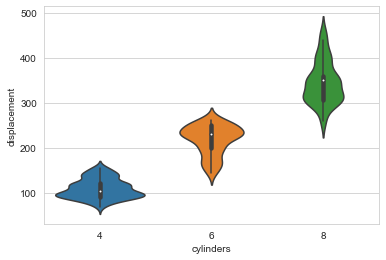

In [142]:
sns.violinplot(x=cars.cylinders, y=cars.displacement);

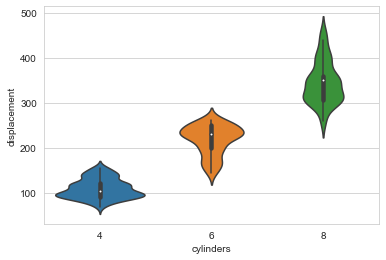

In [143]:
sns.violinplot(x="cylinders", y="displacement", data=cars);

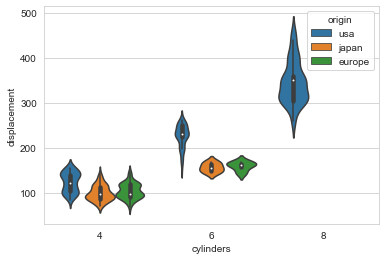

In [144]:
sns.violinplot(x="cylinders", y="displacement", data=cars, hue="origin");

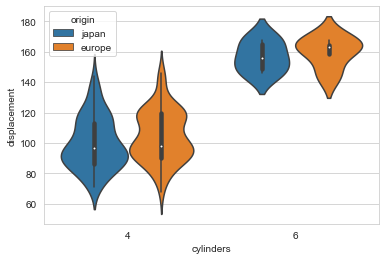

In [145]:
sns.violinplot(x="cylinders", y="displacement", hue="origin",
               data=cars[cars.origin.isin(["japan","europe"])]
              );

## split

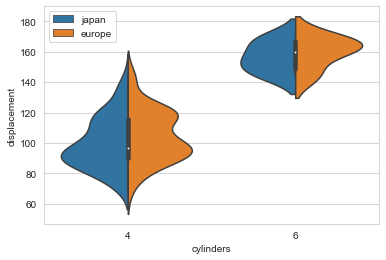

In [147]:
sns.violinplot(x="cylinders", y="displacement", hue="origin",
               data=cars[cars.origin.isin(["japan","europe"])],
               split=True
              )

plt.legend(loc=2);

## inner

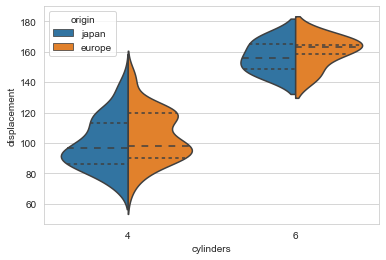

In [148]:
sns.violinplot(x="cylinders", y="displacement", hue="origin",
               data=cars[cars.origin.isin(["japan","europe"])],
               split=True,
               inner="quartiles"
              );

## scale

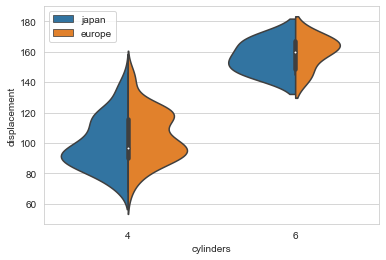

In [150]:
sns.violinplot(x="cylinders", y="displacement", hue="origin",
               data=cars[cars.origin.isin(["japan","europe"])],
               split=True,
               scale="count"
              )

plt.legend(loc=2);

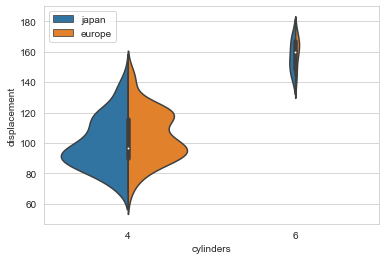

In [152]:
sns.violinplot(x="cylinders", y="displacement", hue="origin",
               data=cars[cars.origin.isin(["japan","europe"])],
               split=True,
               scale="count",
               scale_hue=False
              )

plt.legend(loc=2);  # count'a göre scale yaptığımızda sayısı az olan grup daha dar görünür.

In [154]:
cars[cars.origin.isin(["japan","europe"])].groupby("cylinders").origin.value_counts()

cylinders  origin
4          japan     69
           europe    61
6          japan      6
           europe     4
Name: origin, dtype: int64

<AxesSubplot:xlabel='origin', ylabel='displacement'>

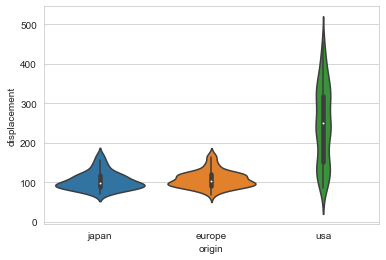

In [157]:
sns.violinplot(x="origin", y="displacement", data= cars, order=["japan","europe","usa"])

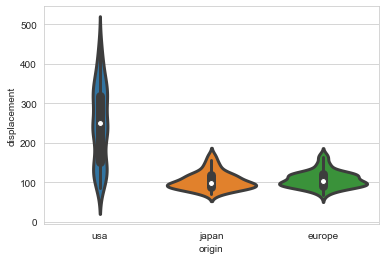

In [161]:
sns.violinplot(x="origin", y="displacement", data= cars, linewidth=3);

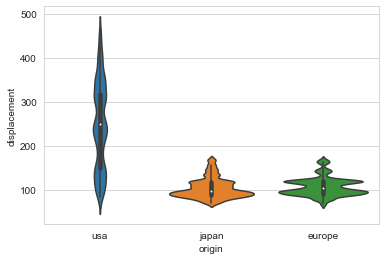

In [163]:
sns.violinplot(x="origin", y="displacement", data= cars, bw=0.2);  # bw: bandwidth